----
#**Data PreProcessing & Linear Regression : Housing Prices**

**Abstract:**

*This assignment focuses on the pre-processing and analysis of housing price data using linear regression. It begins with data loading and handling missing values, proceeds to encode categorical data, and then splits the dataset for model training and testing. Linear regression is applied to model the relationship between property area and housing prices, facilitating predictions for specific property sizes. The assignment further demonstrates the visualization of the linear regression line and the manual validation of predictions, providing a comprehensive overview of data analysis and prediction in the context of housing prices.*


**Technologies:**
*Python, Pandas, NumPy, Matplotlib, scikit-learn, SimpleImputer.*

-----

Importing necessary libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading up the data into a dataframe

In [26]:
path = '/content/housingprice_assignment.xlsx'
df = pd.read_excel(path)
print(df.head(5))
print()
print(df.tail(5))
print(df.shape)

    cities    area   price
0  Seattle  2100.0  450000
1    Miami  2200.0  465000
2   Austin  2300.0  480000
3   Denver  2300.0  490000
4  Seattle  2400.0  495000

     cities    area   price
25    Miami  3675.0  725000
26   Austin  3715.0  740000
27   Denver  3800.0  755000
28  Seattle  3912.0  760000
29    Miami  4000.0  780000
(30, 3)


#**Selecting Independent & Dependent Variables**
'Area' is the independent variable while 'price' is the dependent variable.

The dataframe will be split into two numpy arrays to store each of the variables.

In [27]:
cityArea = df.iloc[0: , 0:2].values     # Independent Variable 'area'
price = df.iloc[0: ,2:3 ].values    # Dependent Variable 'price'

In [28]:
cityArea

array([['Seattle', 2100.0],
       ['Miami', 2200.0],
       ['Austin', 2300.0],
       ['Denver', 2300.0],
       ['Seattle', 2400.0],
       ['Miami', 2500.0],
       ['Austin', 2600.0],
       ['Denver', 2600.0],
       ['Seattle', 2700.0],
       ['Miami', nan],
       ['Austin', 2700.0],
       ['Denver', 2800.0],
       ['Seattle', 2800.0],
       ['Miami', 2900.0],
       ['Austin', 2900.0],
       ['Denver', 3000.0],
       ['Seattle', 3100.0],
       ['Miami', 3100.0],
       ['Austin', 3200.0],
       ['Denver', 3200.0],
       ['Seattle', 3300.0],
       ['Miami', 3300.0],
       ['Austin', 3400.0],
       ['Denver', 3500.0],
       ['Seattle', 3600.0],
       ['Miami', 3675.0],
       ['Austin', 3715.0],
       ['Denver', 3800.0],
       ['Seattle', 3912.0],
       ['Miami', 4000.0]], dtype=object)

In [29]:
price

array([[450000],
       [465000],
       [480000],
       [490000],
       [495000],
       [520000],
       [540000],
       [550000],
       [555000],
       [565000],
       [565000],
       [575000],
       [585000],
       [590000],
       [600000],
       [610000],
       [610000],
       [630000],
       [635000],
       [670000],
       [680000],
       [690000],
       [700000],
       [710000],
       [715000],
       [725000],
       [740000],
       [755000],
       [760000],
       [780000]])

#**Managing Missing Data**
Checking if there is any missing values in the array.

In [30]:
print(np.isnan(cityArea[0: ,1:2].astype(float)).sum())
print(np.isnan(price).sum())

1
0


There is 1 missing value in area column.

We can use SimpleImputer method of sklearn library to solve this.

In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer.fit(cityArea[0: ,1:2])

cityArea[0: ,1:2] = imputer.transform(cityArea[0: ,1:2])
print(cityArea)

[['Seattle' 2100.0]
 ['Miami' 2200.0]
 ['Austin' 2300.0]
 ['Denver' 2300.0]
 ['Seattle' 2400.0]
 ['Miami' 2500.0]
 ['Austin' 2600.0]
 ['Denver' 2600.0]
 ['Seattle' 2700.0]
 ['Miami' 2300.0]
 ['Austin' 2700.0]
 ['Denver' 2800.0]
 ['Seattle' 2800.0]
 ['Miami' 2900.0]
 ['Austin' 2900.0]
 ['Denver' 3000.0]
 ['Seattle' 3100.0]
 ['Miami' 3100.0]
 ['Austin' 3200.0]
 ['Denver' 3200.0]
 ['Seattle' 3300.0]
 ['Miami' 3300.0]
 ['Austin' 3400.0]
 ['Denver' 3500.0]
 ['Seattle' 3600.0]
 ['Miami' 3675.0]
 ['Austin' 3715.0]
 ['Denver' 3800.0]
 ['Seattle' 3912.0]
 ['Miami' 4000.0]]


#**Encoding Categorical Data - Independent Values**
Start by checking if there are non-numerical values in the array: 'areaCity' and 'price'

In [32]:
print(type(cityArea[0,0]))    # String
print(type(cityArea[0,1]))    # Float

print(type(price[0,0]))       # int64

<class 'str'>
<class 'float'>
<class 'numpy.int64'>


The first column of array 'cityArea' is of String datatype,
we need to encode it to make it numerical format for machine
to understand.

We can import OneHotEncoder from sklearn library to convert Categorial Data into numerical format for machine to understand.

In [33]:
from sklearn.preprocessing import OneHotEncoder
transformer = [('encoder', OneHotEncoder(), [0])]   # Apply OneHotEncoder to first column of array.

We can import 'ColumnTransformer' utility from sklearn library to apply transformation to our columns.

In [34]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = transformer, remainder = 'passthrough')

Apply the Encoding and Transformation to necessary array.

In [35]:
# fit the column transformer on the data
ct.fit(cityArea)

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])

In [36]:
# Transform the data using the fitted ColumnTransformer
transformed_data = ct.transform(cityArea)

# Convert the tranformed data into an array
cityArea = np.array(transformed_data)

In [37]:
cityArea

array([[0.0, 0.0, 0.0, 1.0, 2100.0],
       [0.0, 0.0, 1.0, 0.0, 2200.0],
       [1.0, 0.0, 0.0, 0.0, 2300.0],
       [0.0, 1.0, 0.0, 0.0, 2300.0],
       [0.0, 0.0, 0.0, 1.0, 2400.0],
       [0.0, 0.0, 1.0, 0.0, 2500.0],
       [1.0, 0.0, 0.0, 0.0, 2600.0],
       [0.0, 1.0, 0.0, 0.0, 2600.0],
       [0.0, 0.0, 0.0, 1.0, 2700.0],
       [0.0, 0.0, 1.0, 0.0, 2300.0],
       [1.0, 0.0, 0.0, 0.0, 2700.0],
       [0.0, 1.0, 0.0, 0.0, 2800.0],
       [0.0, 0.0, 0.0, 1.0, 2800.0],
       [0.0, 0.0, 1.0, 0.0, 2900.0],
       [1.0, 0.0, 0.0, 0.0, 2900.0],
       [0.0, 1.0, 0.0, 0.0, 3000.0],
       [0.0, 0.0, 0.0, 1.0, 3100.0],
       [0.0, 0.0, 1.0, 0.0, 3100.0],
       [1.0, 0.0, 0.0, 0.0, 3200.0],
       [0.0, 1.0, 0.0, 0.0, 3200.0],
       [0.0, 0.0, 0.0, 1.0, 3300.0],
       [0.0, 0.0, 1.0, 0.0, 3300.0],
       [1.0, 0.0, 0.0, 0.0, 3400.0],
       [0.0, 1.0, 0.0, 0.0, 3500.0],
       [0.0, 0.0, 0.0, 1.0, 3600.0],
       [0.0, 0.0, 1.0, 0.0, 3675.0],
       [1.0, 0.0, 0.0, 0.0, 3715.0],
 

#**Enconding Categorial Data - Dependent Variable**

In [38]:
print(type(price[0,0]))    # int64

<class 'numpy.int64'>


Since, the datatype of price array's elements are numerical(int64), we don't need encoding.

#**Splitting the dataset into Train Set & Test Set**

Importing the method 'train_test_split' from sklearn library

In [39]:
from sklearn.model_selection import train_test_split

Split the data into Training Set & Test Set in 80:20 ratio.

Lock the random output to state 1.

In [40]:
area_train, area_test, price_train, price_test = train_test_split(cityArea[0: ,4:5], price, test_size = 0.2, random_state = 1)

In [41]:
print(area_train, "\n\n", area_test, "\n\n", price_train, "\n\n", price_test)

[[3715.0]
 [2300.0]
 [3600.0]
 [3400.0]
 [3500.0]
 [2400.0]
 [2300.0]
 [3675.0]
 [2600.0]
 [3200.0]
 [2900.0]
 [2600.0]
 [3800.0]
 [2200.0]
 [3100.0]
 [2100.0]
 [3000.0]
 [4000.0]
 [3912.0]
 [2300.0]
 [2700.0]
 [2800.0]
 [2800.0]
 [2500.0]] 

 [[3100.0]
 [3300.0]
 [2700.0]
 [3200.0]
 [2900.0]
 [3300.0]] 

 [[740000]
 [490000]
 [715000]
 [700000]
 [710000]
 [495000]
 [480000]
 [725000]
 [540000]
 [635000]
 [590000]
 [550000]
 [755000]
 [465000]
 [610000]
 [450000]
 [610000]
 [780000]
 [760000]
 [565000]
 [555000]
 [585000]
 [575000]
 [520000]] 

 [[630000]
 [690000]
 [565000]
 [670000]
 [600000]
 [680000]]


#**Linear Regression**
Visualizing the data: Area / Prices using a Scatter Plot

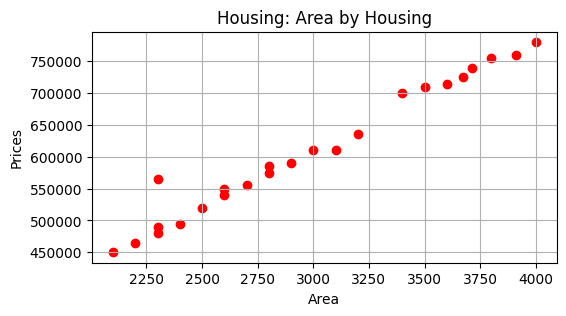

In [42]:
plt.figure(figsize = (6,3))

plt.scatter(area_train, price_train, color = 'red', marker = 'o')

plt.xlabel('Area')
plt.ylabel('Prices')

plt.title('Housing: Area by Housing')
plt.grid(True)

plt.show()

#**Prediction using Linear Regression**
Importing the 'LinearRegression' from sklearn library

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
reg_housing = LinearRegression()
reg_housing.fit(area_train, price_train)

LinearRegression()

Prediction of Price of a House with an area of 3400

In [45]:
area_for_prediction = 3400

reg_housing.predict([[area_for_prediction]])       # 680715.55529319

array([[680715.55529319]])

Manual Calculation using coef_ and intercept_function of LinearRegression

In [46]:
coefficient = reg_housing.coef_
intercept = reg_housing.intercept_

Using the linear equation formula,

calculating y(price) = m * x(area) + interception

In [47]:
predict_for = 3400
price_calc = coefficient * predict_for + intercept
print(price_calc)

[[680715.55529319]]


The prediction matches the manual calculation value.

----

#**Data Visualization**

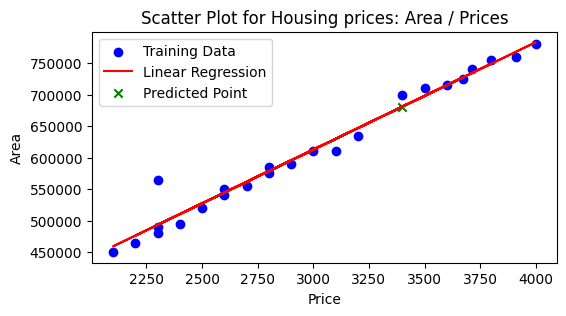

In [48]:
# Scatter Plot using training data
plt.figure(figsize = (6,3))

plt.scatter(area_train, price_train, label = "Training Data", color = 'blue')
plt.xlabel('Price')
plt.ylabel('Area')
plt.legend()
plt.title('Scatter Plot for Housing prices: Area / Prices')


# Linear Regression Line
area_values = area_train
price_predictions = reg_housing.predict(area_values)

plt.plot(area_values, price_predictions, label = "Linear Regression", color = 'red')
plt.plot()

# Prediction points

#predict_for = 3300
plt.scatter([predict_for], [reg_housing.predict([[predict_for]])], color = 'green', marker = 'x', label = "Predicted Point")

plt.legend()
plt.show()


**Conclusion:**

*In this assignment, the application of linear regression to housing price data demonstrated its effectiveness in modeling the price-area relationship. Through data preprocessing, encoding, and visualization, this project illustrates how linear regression can be a valuable tool for predicting property prices. The manual validation further emphasizes the reliability of the model, offering valuable insights into data analysis and prediction in the real estate market.*